# *k*-Nearest Neighbors

This notebook implements k-nearest neighbors, which is a nonparametric machine learning algorithm. Abbreviated as knn, the algorithm is based on the idea that similar data points are grouped together and close in proximity.

---

First, load the relevant libraries needed.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Import a nice function for plotting decision boundaries
from mlxtend.plotting import plot_decision_regions

# Set the Seaborn theme
sns.set_theme()

# Import functions from scikit-learn to help with training/testing endeavors
from sklearn.model_selection import train_test_split

### The Data

The model will be trained using the [Hawks](https://r-data.pmagunia.com/dataset/r-dataset-package-stat2data-hawks) dataset. This dataset contains observations for three species of hawks, and attributes such as age, sex, wing length, body weight, tail length, etc. 

The code block below reads the dataset into a pandas DataFrame object, subsets the DataFrame to the relevant variables, and drops any rows where there are missing values for these relevant variables.

In [2]:
# Read in the data and subset it to the relevant columns/observations
hawks = pd.read_csv("../../Data/hawks.csv")
hawks = hawks[["Species", "Wing", "Tail"]].dropna(axis=0)
hawks

,Species,Wing,Tail
0,RT,385.0,219
1,RT,376.0,221
2,RT,381.0,235
3,CH,265.0,220
4,SS,205.0,157
...,...,...,...
903,RT,380.0,224
904,SS,190.0,150
905,RT,360.0,211
906,RT,369.0,207


### Implementing the Algorithm

The class below contains methods that are useful to implementing the *k*-nearest neighbors algorithm.

For details about the algorithm, check out the `README.md` file of this `knn` directory. In summary, we calculate the distance from a test data point to every point in the training set, find the k nearest, and decide the final prediction based on a majority score.

In [3]:
class kNN:
    """
    A class with the functionalities to perform the k-nearest neighbors algorithm
    """

    #def __init__(self):
    #    self.k = 1
    
    def distance(self, p, q):
        """
        Calculates the Euclidean distance between p and q
        """
        return np.sqrt((p - q) @ (p - q))
    
    def get_knn(self, point, training_features, training_labels, k):
        """
        Obtain the k nearest neighbors by distance for an inputted point
        """
        # Create an empty list to store neighbors and distances
        neighbors = []

        for p, label in zip(training_features, training_labels):
            d = self.distance(point, p)
            temp_data = [p, label, d]
            neighbors.append(temp_data)
        
        neighbors.sort(key = lambda x : x[-1])
    
        return neighbors[:k]

    def predict(self, point, training_features, training_labels, k, regression = False):
        """
        Obtain a prediction based on the kNN algorithm for an inputted point
        """
        neighbors = self.get_knn(point, training_features, training_labels, k)

        if regression == False:
            labels = [x[1] for x in neighbors]
            return max(labels, key = labels.count)
        else:
            return sum(x[1] for x in neighbors)/k

    def classification_error(self, test_features, test_labels,
                             training_features, training_labels, k):
        """
        Compute the classification error of a testing set (classification tasks only)
        """
        error = 0
        for point, label in zip(test_features, test_labels):
            error += label != self.predict(point, training_features, training_labels, k)
        return error/len(test_features)
    
    def classification_error_plot(self, test_features, test_labels,
                                  training_features, training_labels):
        possible_k = [k for k in range(3, int(np.ceil(np.sqrt(len(training_labels)))), 2)]
        errors = [self.classification_error(test_features, test_labels,
                                            training_features, training_labels, k) for k in possible_k]

        plt.figure(figsize = (8, 6))
        plt.plot(possible_k, errors, color = 'red', marker = "o")
        plt.xlabel('k', fontsize = 14)
        plt.ylabel('Classification Error', fontsize = 14)
        plt.xticks(possible_k)

#### KNN with 2 features: wing & tail length

First, I run KNN with the two features that have been commonly used as a starting point for classification tasks.

In [4]:
# Data preparation step
X = hawks[["Wing", "Tail"]].to_numpy()
y = hawks["Species"].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

The first step is to determine the value of *k* that is most appropriate. This will be determined by trying a set of *k*'s and determining which produces the least error on the test set, keeping into account the following:

* Small values of *k* can lead to overfitting and higher influences of noise in the data
* Large values of *k* are computationally expensive and can lead to underfitting
* Even values of *k* cause complications when ties arise

The plot below displays the classification error for a range of *k*'s from 3 to $\sqrt n$, a widely accepted optimal value for *k*, where n is the number of training samples.

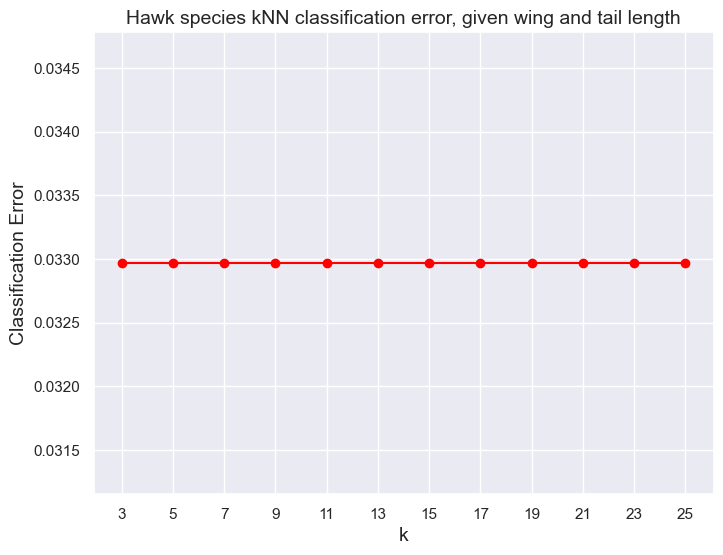

In [5]:
hawks_knn = kNN()

hawks_knn.classification_error_plot(X_test, y_test, X_train, y_train)
plt.title("Hawk species kNN classification error, given wing and tail length", fontsize = 14)
plt.show()

Interestingly, any choice of k results in the same classification error. 

Now, I will show the predictions for select data points to show what's going on behind the scenes of this algorithm.

In [6]:
print(X_test[13], y_test[13]) # show the features and the true label

print(hawks_knn.predict(X_test[13], X_train, y_train, 5)) # show the predicted label, k = 5

hawks_knn.get_knn(X_test[13], X_train, y_train, 5)

[360. 240.] RT
RT


[[array([363., 242.]), 'RT', 3.605551275463989],
 [array([362., 234.]), 'RT', 6.324555320336759],
 [array([367., 238.]), 'RT', 7.280109889280518],
 [array([361., 231.]), 'RT', 9.055385138137417],
 [array([365., 232.]), 'RT', 9.433981132056603]]

In [7]:
print(X_test[50], y_test[50]) # show the features and the true label

print(hawks_knn.predict(X_test[50], X_train, y_train, 10)) # show the predicted label, k = 10

hawks_knn.get_knn(X_test[50], X_train, y_train, 10)

[199. 160.] SS
SS


[[array([199., 159.]), 'SS', 1.0],
 [array([199., 161.]), 'SS', 1.0],
 [array([198., 159.]), 'SS', 1.4142135623730951],
 [array([198., 158.]), 'SS', 2.23606797749979],
 [array([200., 158.]), 'SS', 2.23606797749979],
 [array([201., 162.]), 'SS', 2.8284271247461903],
 [array([202., 160.]), 'SS', 3.0],
 [array([202., 160.]), 'SS', 3.0],
 [array([199., 157.]), 'SS', 3.0],
 [array([199., 157.]), 'CH', 3.0]]

The demonstration of k-nearest neighbors on these data points shows how the algorithm finds the nearest points and then uses the majority to produce the final prediction.

#### KNN with 5 features: 


To be added

### Using scikit-learn

In [8]:
import sklearn.neighbors
model = sklearn.neighbors.KNeighborsRegressor(n_neighbors = 3)